# AB Testi ile Bidding Yöntemlerinin Dönüşümünün Karşılaştırılması

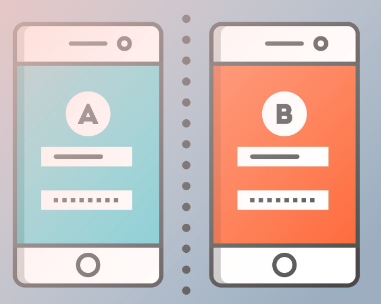

**İş Problemi**

Facebook kısa süre önce mevcut "maximum bidding" adı verilen teklif verme türüne alternatif olarak yeni bir teklif türü olan "average bidding"’i tanıttı.

Müşterilerimizden biri olan bombabomba.com, bu yeni özelliği test etmeye karar verdi ve average bidding'in maximum bidding'den daha fazla dönüşüm getirip getirmediğini anlamak için bir A/B testi yapmak istiyor.

A/B testi 1 aydır devam ediyor ve bombabomba.com şimdi sizden bu A/B testinin sonuçlarını analiz etmenizi bekliyor. Bombabomba.com için nihai başarı ölçütü Purchase'dır. Bu nedenle, istatistiksel testler için Purchase metriğine odaklanılmalıdır.

**Veri Seti Hikayesi**

Bir firmanın web site bilgilerini içeren bu veri setinde kullanıcıların gördükleri ve tıkladıkları reklam sayıları gibi bilgilerin yanı sıra buradan gelen kazanç bilgileri yer almaktadır. Kontrol ve Test grubu olmak üzere iki ayrı veri seti vardır. Bu veri setleri ab_testing.xlsx excel’inin ayrı sayfalarında yer almaktadır. Kontrol grubuna Maximum Bidding, test grubuna Average Bidding uygulanmıştır.

* impression: Reklam görüntüleme sayısı
* Click: Görüntülenen reklama tıklama sayısı
* Purchase: Tıklanan reklamlar sonrası satın alınan ürün sayısı
* Earning: Satın alınan ürünler sonrası elde edilen kazanç

**AB Testing (Bağımsız İki Örneklem T Testi)**

1. Hipotezleri Kur
2. Varsayım Kontrolü
  - 1. Normallik Varsayımı (shapiro)
  - 2. Varyans Homojenliği (levene)
3. Hipotezin Uygulanması
  - 1. Varsayımlar sağlanıyorsa bağımsız iki örneklem t testi
  - 2. Varsayımlar sağlanmıyorsa mannwhitneyu testi
4. p-value değerine göre sonuçları yorumla

Not:
- Normallik sağlanmıyorsa direkt 2 numara. Varyans homojenliği sağlanmıyorsa 1 numaraya argüman girilir.
- Normallik incelemesi öncesi aykırı değer incelemesi ve düzeltmesi yapmak faydalı olabilir.

# Görev 1:  Veriyi Hazırlama ve Analiz Etme

In [1]:
# Adım 1: ab_testing_data.xlsx adlı kontrol ve test grubu verilerinden oluşan veri setini okutunuz. 
# Kontrol ve test grubu verilerini ayrı değişkenlere atayınız.

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, ttest_ind

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

dataframe_control = pd.read_excel("/kaggle/input/ab-testing/ab_testing.xlsx" , sheet_name="Control Group")
dataframe_test = pd.read_excel("/kaggle/input/ab-testing/ab_testing.xlsx" , sheet_name="Test Group")

df_control = dataframe_control.copy()
df_test = dataframe_test.copy()

In [2]:
df_control.head(5)

,Impression,Click,Purchase,Earning
0,82529.45927,6090.07732,665.21125,2311.27714
1,98050.45193,3382.86179,315.08489,1742.80686
2,82696.02355,4167.96575,458.08374,1797.82745
3,109914.40040,4910.88224,487.09077,1696.22918
4,108457.76263,5987.65581,441.03405,1543.72018


In [3]:
df_test.head(5)

,Impression,Click,Purchase,Earning
0,120103.50380,3216.54796,702.16035,1939.61124
1,134775.94336,3635.08242,834.05429,2929.40582
2,107806.62079,3057.14356,422.93426,2526.24488
3,116445.27553,4650.47391,429.03353,2281.42857
4,145082.51684,5201.38772,749.86044,2781.69752


In [4]:
# Adım 2: Kontrol ve test grubu verilerini analiz ediniz.

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head())
    print("##################### Tail #####################")
    print(dataframe.tail())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [5]:
check_df(df_control)

##################### Shape #####################
(40, 4)
##################### Types #####################
Impression    float64
Click         float64
Purchase      float64
Earning       float64
dtype: object
##################### Head #####################
    Impression      Click  Purchase    Earning
0  82529.45927 6090.07732 665.21125 2311.27714
1  98050.45193 3382.86179 315.08489 1742.80686
2  82696.02355 4167.96575 458.08374 1797.82745
3 109914.40040 4910.88224 487.09077 1696.22918
4 108457.76263 5987.65581 441.03405 1543.72018
##################### Tail #####################
     Impression      Click  Purchase    Earning
35 132064.21900 3747.15754 551.07241 2256.97559
36  86409.94180 4608.25621 345.04603 1781.35769
37 123678.93423 3649.07379 476.16813 2187.72122
38 101997.49410 4736.35337 474.61354 2254.56383
39 121085.88122 4285.17861 590.40602 1289.30895
##################### NA #####################
Impression    0
Click         0
Purchase      0
Earning       0
dtype: int6

In [6]:
check_df(df_test)

##################### Shape #####################
(40, 4)
##################### Types #####################
Impression    float64
Click         float64
Purchase      float64
Earning       float64
dtype: object
##################### Head #####################
    Impression      Click  Purchase    Earning
0 120103.50380 3216.54796 702.16035 1939.61124
1 134775.94336 3635.08242 834.05429 2929.40582
2 107806.62079 3057.14356 422.93426 2526.24488
3 116445.27553 4650.47391 429.03353 2281.42857
4 145082.51684 5201.38772 749.86044 2781.69752
##################### Tail #####################
     Impression      Click  Purchase    Earning
35  79234.91193 6002.21358 382.04712 2277.86398
36 130702.23941 3626.32007 449.82459 2530.84133
37 116481.87337 4702.78247 472.45373 2597.91763
38  79033.83492 4495.42818 425.35910 2595.85788
39 102257.45409 4800.06832 521.31073 2967.51839
##################### NA #####################
Impression    0
Click         0
Purchase      0
Earning       0
dtype: int6

In [7]:
# Adım 3: Analiz işleminden sonra concat metodunu kullanarak kontrol ve test grubu verilerini birleştiriniz.

df_control["group"] = "control"
df_test["group"] = "test"

df = pd.concat([df_control, df_test], axis=0, ignore_index=False)
df.head()

,Impression,Click,Purchase,Earning,group
0,82529.45927,6090.07732,665.21125,2311.27714,control
1,98050.45193,3382.86179,315.08489,1742.80686,control
2,82696.02355,4167.96575,458.08374,1797.82745,control
3,109914.40040,4910.88224,487.09077,1696.22918,control
4,108457.76263,5987.65581,441.03405,1543.72018,control


# Görev 2:  A/B Testinin Hipotezinin Tanımlanması

In [8]:
# Adım 1: Hipotezi tanımlayınız.

# H0 : M1 = M2 (Kontrol grubu ve test grubu satın alma ortalamaları arasında fark yoktur.)
# H1 : M1!= M2 (Kontrol grubu ve test grubu satın alma ortalamaları arasında fark vardır.)

In [9]:
# Adım 2: Kontrol ve test grubu için purchase(kazanç) ortalamalarını analiz ediniz

df.groupby("group").agg({"Purchase": "mean"})

,Purchase
group,
control,550.89406
test,582.10610


# GÖREV 3: Hipotez Testinin Gerçekleştirilmesi

**AB Testing (Bağımsız İki Örneklem T Testi)**

In [10]:
# Adım 1: Hipotez testi yapılmadan önce varsayım kontrollerini yapınız.
# Bunlar Normallik Varsayımı ve Varyans Homojenliğidir.

# Kontrol ve test grubunun normallik varsayımına uyup uymadığını Purchase değişkeni üzerinden ayrı ayrı test ediniz.

# Normallik Varsayımı:

# H0: Normal dağılım varsayımı sağlanmaktadır.
# H1: Normal dağılım varsayımı sağlanmamaktadır
# p < 0.05 H0 RED
# p > 0.05 H0 REDDEDİLEMEZ
# Test sonucuna göre normallik varsayımı kontrol ve test grupları için sağlanıyor mu?
# Elde edilen p-value değerlerini yorumlayınız.

test_stat, pvalue = shapiro(df.loc[df["group"] == "control", "Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# p-value=0.5891
# HO reddedilemez. Control grubunun değerleri normal dağılım varsayımını sağlamaktadır.


test_stat, pvalue = shapiro(df.loc[df["group"] == "test", "Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# p-value=0.1541
# HO reddedilemez. Control grubunun değerleri normal dağılım varsayımını sağlamaktadır.

Test Stat = 0.9773, p-value = 0.5891
Test Stat = 0.9589, p-value = 0.1541


In [11]:
# Varyans Homojenliği:

# H0: Varyanslar homojendir.
# H1: Varyanslar homojen Değildir.
# p < 0.05 H0 RED
# p > 0.05 H0 REDDEDİLEMEZ
# Kontrol ve test grubu için varyans homojenliğinin sağlanıp sağlanmadığını Purchase değişkeni üzerinden test ediniz.
# Test sonucuna göre normallik varsayımı sağlanıyor mu?
# Elde edilen p-value değerlerini yorumlayınız.

test_stat, pvalue = levene(df.loc[df["group"] == "control", "Purchase"],
                           df.loc[df["group"] == "test", "Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# p-value=0.1083
# HO reddedilemez. Control ve Test grubunun değerleri varyans homejenliği varsayımını sağlamaktadır.
# Varyanslar Homojendir.

Test Stat = 2.6393, p-value = 0.1083


In [12]:
# Adım 2: Normallik Varsayımı ve Varyans Homojenliği sonuçlarına göre uygun testi seçiniz.

# Varsayımlar sağlandığı için bağımsız iki örneklem t testi (parametrik test) yapılmaktadır.
# H0: M1 = M2 (Kontrol grubu ve test grubu satın alma ortalamaları arasında ist.ol.anl. fark yoktur.)
# H1: M1 != M2 (Kontrol grubu ve test grubu satın alma ortalamaları arasında ist.ol.anl. fark vardır)
# p<0.05 HO RED , p>0.05 HO REDDEDİLEMEZ

test_stat, pvalue = ttest_ind(df.loc[df["group"] == "control", "Purchase"],
                              df.loc[df["group"] == "test", "Purchase"],
                              equal_var=True)

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

# Adım 3: Test sonucunda elde edilen p_value değerini göz önünde bulundurarak kontrol ve test grubu satın alma
# ortalamaları arasında istatistiki olarak anlamlı bir fark olup olmadığını yorumlayınız.

# p-value=0.3493
# HO reddedilemez. Kontrol ve test grubu satın alma ortalamaları arasında istatistiksel olarak anlamlı farklılık yoktur.

Test Stat = -0.9416, p-value = 0.3493
